In [1]:
import mitsuba as mi
mi.set_variant("cuda_ad_rgb")
from PDE3D.BoundaryShape import *
from PDE3D.Coefficient import *
from PDE3D.utils import *

In [2]:
fd_step = 5e-3
fd = fd_step / 2
radius = 1
scale_cam = 0.7
shape = Sphere(radius = radius)
def tex(points : mi.Point3f):
    return dr.dot(points, mi.Point3f(1,0,0)) + dr.sin(points[0] * points[1] + points[2]) + dr.cos(points[0])

cmap = "viridis"
s = 1.1
bbox_tex = mi.BoundingBox3f(min = mi.Point3f(-s,-s,-s) * radius, max = mi.Point3f(2 * s,3 * s, 7 * s) * radius)
resolution = [128, 128, 128]
points = create_bbox_points(bbox_tex, resolution, spp = 1, centered = True)
res_tex = tex(points) 
vol, _ = create_volume_from_result(res_tex, resolution)

In [3]:
resolution = [256, 256]
spp = 256
offset_x = 0.0
offset_y = 0.0
offset_z = 0.0
slice_x = Slice(offset = offset_x, axis = "x", scale = radius)
slice_y = Slice(offset = offset_y, axis = "y", scale = radius)
slice_z = Slice(offset = offset_z, axis = "z", scale = radius)
points_x, _ = slice_x.create_slice_points(resolution = resolution, spp = spp)
points_y, _ = slice_y.create_slice_points(resolution = resolution, spp = spp)
points_z, _ = slice_z.create_slice_points(resolution = resolution, spp = spp)
cam_x = mi.ScalarPoint3f(1,1,2)
cam_y = mi.ScalarPoint3f(1,1,2)
cam_z = mi.ScalarPoint3f(1,1,2)

16777216
[0.1647699773311615, 1.835212230682373]
16777216
[-0.6965565085411072, 2.1461572647094727]
16777216
[-0.6674509048461914, 1.9622595310211182]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].


Text(0.5, 1.0, 'Cut z')

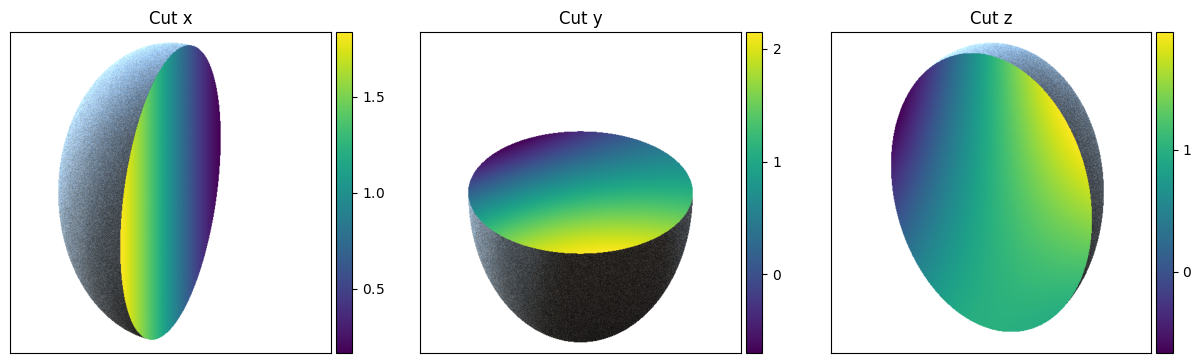

In [4]:
tex_x = tex(points_x)
tex_y = tex(points_y)
tex_z = tex(points_z)
_, image_x_f = create_slice_from_result(tex_x, resolution)
_, image_y_f = create_slice_from_result(tex_y, resolution)
_, image_z_f = create_slice_from_result(tex_z, resolution)

tex3D_x_f, norm_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = image_x_f, colormap = cmap, scale_cam=scale_cam)
tex3D_y_f, norm_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = image_y_f, colormap = cmap, scale_cam=scale_cam)
tex3D_z_f, norm_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = image_z_f, colormap = cmap, scale_cam=scale_cam)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
plot_image_3D(tex3D_x_f, ax1, norm = norm_x, cmap = cmap)
plot_image_3D(tex3D_y_f, ax2, norm = norm_y, cmap = cmap)
plot_image_3D(tex3D_z_f, ax3, norm = norm_z, cmap = cmap)
ax1.set_title("Cut x")
ax2.set_title("Cut y")
ax3.set_title("Cut z")

16777216
[0.1653171330690384, 1.8344433307647705]
16777216
[-0.69618821144104, 2.145435333251953]
16777216
[-0.667158842086792, 1.9617266654968262]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].


Text(0.5, 1.0, 'Cut z')

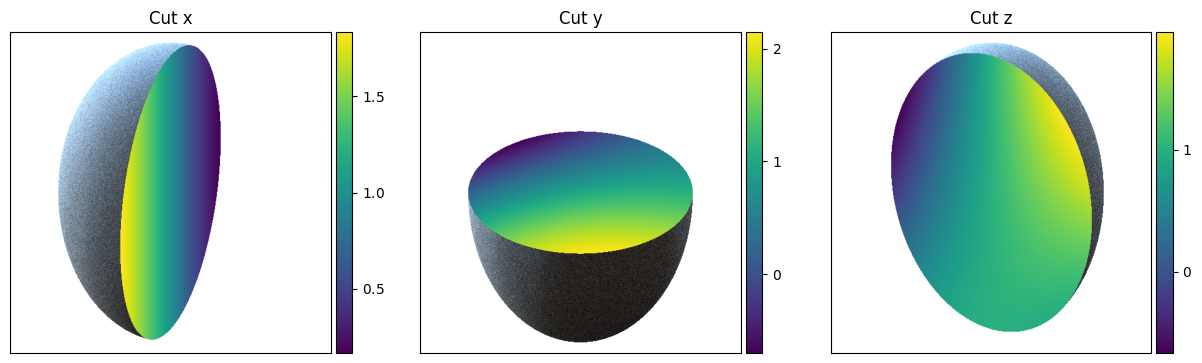

In [5]:

tex = TextureCoefficient("tex", bbox_tex, vol[0])
tex_x = tex.get_value(points_x)
tex_y = tex.get_value(points_y)
tex_z = tex.get_value(points_z)
_, image_x = create_slice_from_result(tex_x, resolution)
_, image_y = create_slice_from_result(tex_y, resolution)
_, image_z = create_slice_from_result(tex_z, resolution)

tex3D_x, norm_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = image_x, colormap = cmap, scale_cam=scale_cam)
tex3D_y, norm_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = image_y, colormap = cmap, scale_cam=scale_cam)
tex3D_z, norm_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = image_z, colormap = cmap, scale_cam=scale_cam)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
plot_image_3D(tex3D_x, ax1, norm = norm_x, cmap = cmap)
plot_image_3D(tex3D_y, ax2, norm = norm_y, cmap = cmap)
plot_image_3D(tex3D_z, ax3, norm = norm_z, cmap = cmap)
ax1.set_title("Cut x")
ax2.set_title("Cut y")
ax3.set_title("Cut z")


16777216
[-0.0005482882261276245, 0.0007698535919189453]
16777216
[-0.0005530267953872681, 0.0007734298706054688]
16777216
[-0.0003719329833984375, 0.0005358457565307617]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].


Text(0, 0.5, 'Difference')

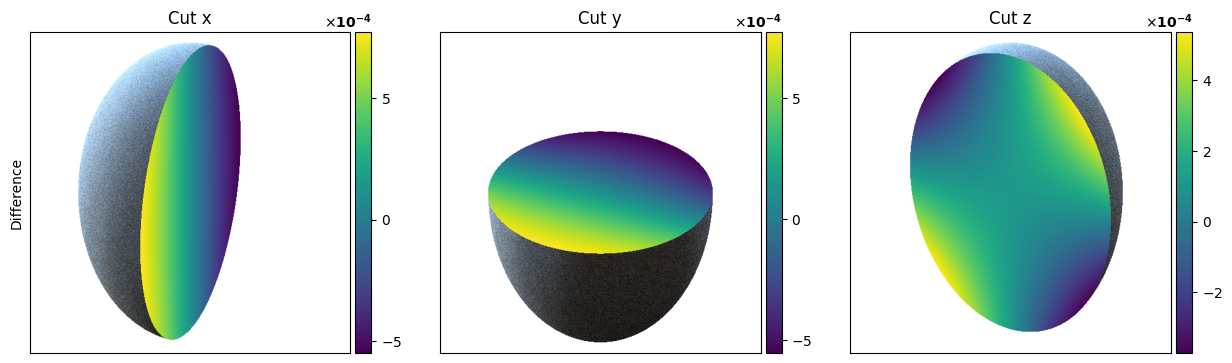

In [6]:
tex3D_x_d, norm_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = image_x_f - image_x, colormap = cmap, scale_cam=scale_cam)
tex3D_y_d, norm_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = image_y_f - image_y, colormap = cmap, scale_cam=scale_cam)
tex3D_z_d, norm_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = image_z_f - image_z, colormap = cmap, scale_cam=scale_cam)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
plot_image_3D(tex3D_x_d, ax1, norm = norm_x, cmap = cmap)
plot_image_3D(tex3D_y_d, ax2, norm = norm_y, cmap = cmap)
plot_image_3D(tex3D_z_d, ax3, norm = norm_z, cmap = cmap)
ax1.set_title("Cut x")
ax2.set_title("Cut y")
ax3.set_title("Cut z")
ax1.set_ylabel("Difference")

In [7]:
grad_x, laplacian_x = tex.get_grad_laplacian(points_x)
grad_y, laplacian_y = tex.get_grad_laplacian(points_y)
grad_z, laplacian_z = tex.get_grad_laplacian(points_z)

16777216
[0.004855596926063299, 1.995241403579712]
16777216
[-0.00010248529724776745, 0.00010220843250863254]
16777216
[0.5494661331176758, 0.9992022514343262]
16777216
[0.004858244210481644, 1.9952222108840942]
16777216
[-0.00010421499609947205, 0.0001039355993270874]
16777216
[0.549465000629425, 0.9992261528968811]
16777216
[-2.1405518054962158e-05, 2.1405518054962158e-05]
16777216
[-6.078264050302096e-06, 6.078264050302096e-06]
16777216
[-2.4745473638176918e-05, 2.4745473638176918e-05]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01555616..1.3949977

Text(0.5, 1.0, 'Grad z')

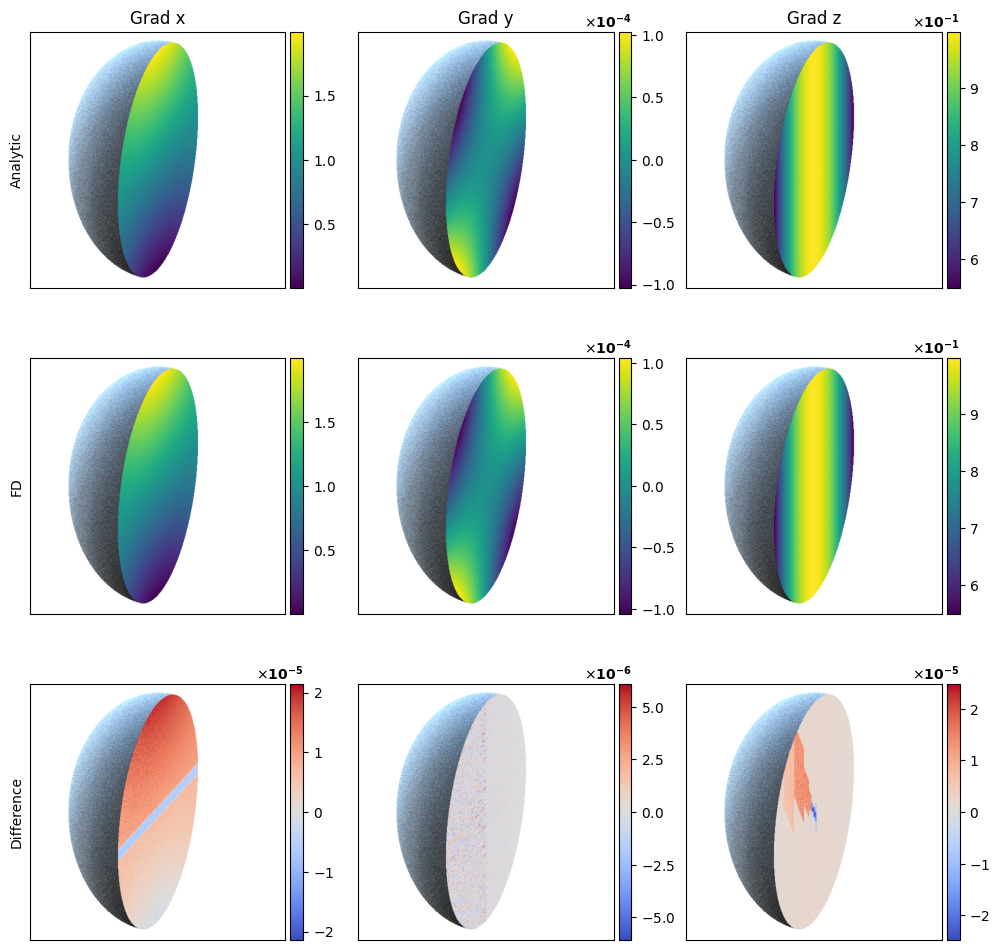

In [8]:

xx_fd1 = tex.get_value(points_x + fd * mi.Point3f(1,0,0))
xx_fd2 = tex.get_value(points_x - fd * mi.Point3f(1,0,0))
xy_fd1 = tex.get_value(points_x + fd * mi.Point3f(0,1,0))
xy_fd2 = tex.get_value(points_x - fd * mi.Point3f(0,1,0))
xz_fd1 = tex.get_value(points_x + fd * mi.Point3f(0,0,1))
xz_fd2 = tex.get_value(points_x - fd * mi.Point3f(0,0,1))

xx_fd = (xx_fd1 - xx_fd2) / fd_step
xy_fd = (xy_fd1 - xy_fd2) / fd_step
xz_fd = (xz_fd1 - xz_fd2) / fd_step

_, fd_xx = create_slice_from_result(xx_fd, resolution)
_, fd_xy = create_slice_from_result(xy_fd, resolution)
_, fd_xz = create_slice_from_result(xz_fd, resolution)

_, analytic_xx = create_slice_from_result(grad_x[0], resolution)
_, analytic_xy = create_slice_from_result(grad_x[1], resolution)
_, analytic_xz = create_slice_from_result(grad_x[2], resolution)


_, diff_xx = create_slice_from_result(grad_x[0] - xx_fd, resolution)
_, diff_xy = create_slice_from_result(grad_x[1] - xy_fd, resolution)
_, diff_xz = create_slice_from_result(grad_x[2] - xz_fd, resolution)


fig, ax = plt.subplots(3,3, figsize = (12,12))

analytic_xx3D, norm_analytic_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = analytic_xx, colormap = cmap, scale_cam=scale_cam)
analytic_xy3D, norm_analytic_y = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = analytic_xy, colormap = cmap, scale_cam=scale_cam)
analytic_xz3D, norm_analytic_z = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = analytic_xz, colormap = cmap, scale_cam=scale_cam)

fd_xx3D, norm_fd_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = fd_xx, colormap = cmap, scale_cam=scale_cam)
fd_xy3D, norm_fd_y = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = fd_xy, colormap = cmap, scale_cam=scale_cam)
fd_xz3D, norm_fd_z = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = fd_xz, colormap = cmap, scale_cam=scale_cam)

diff_xx3D, norm_diff_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = diff_xx, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)
diff_xy3D, norm_diff_y = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = diff_xy, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)
diff_xz3D, norm_diff_z = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = diff_xz, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)

plot_image_3D(analytic_xx3D, ax[0,0], norm = norm_analytic_x, cmap = cmap);
plot_image_3D(analytic_xy3D, ax[0,1], norm = norm_analytic_y, cmap = cmap);
plot_image_3D(analytic_xz3D, ax[0,2], norm = norm_analytic_z, cmap = cmap);

plot_image_3D(fd_xx3D, ax[1,0], norm = norm_fd_x, cmap = cmap);
plot_image_3D(fd_xy3D, ax[1,1], norm = norm_fd_y, cmap = cmap);
plot_image_3D(fd_xz3D, ax[1,2], norm = norm_fd_z, cmap = cmap);

plot_image_3D(diff_xx3D, ax[2,0], norm = norm_diff_x, cmap = "coolwarm");
plot_image_3D(diff_xy3D, ax[2,1], norm = norm_diff_y, cmap = "coolwarm");
plot_image_3D(diff_xz3D, ax[2,2], norm = norm_diff_z, cmap = "coolwarm");

ax[0,0].set_ylabel("Analytic")
ax[1,0].set_ylabel("FD")
ax[2,0].set_ylabel("Difference")

ax[0,0].set_title("Grad x")
ax[0,1].set_title("Grad y")
ax[0,2].set_title("Grad z")

16777216
[0.1606016457080841, 1.8393971920013428]
16777216
[-0.9952030181884766, 0.9951539039611816]
16777216
[0.5427320003509521, 0.9992024898529053]
16777216
[0.16060349345207214, 1.8393943309783936]
16777216
[-0.995189905166626, 0.9951396584510803]
16777216
[0.5426835417747498, 0.9992252588272095]
16777216
[-2.6328489184379578e-05, 2.6328489184379578e-05]
16777216
[-1.8617836758494377e-05, 1.8617836758494377e-05]
16777216
[-4.840572364628315e-05, 4.840572364628315e-05]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid r

Text(0.5, 1.0, 'Grad z')

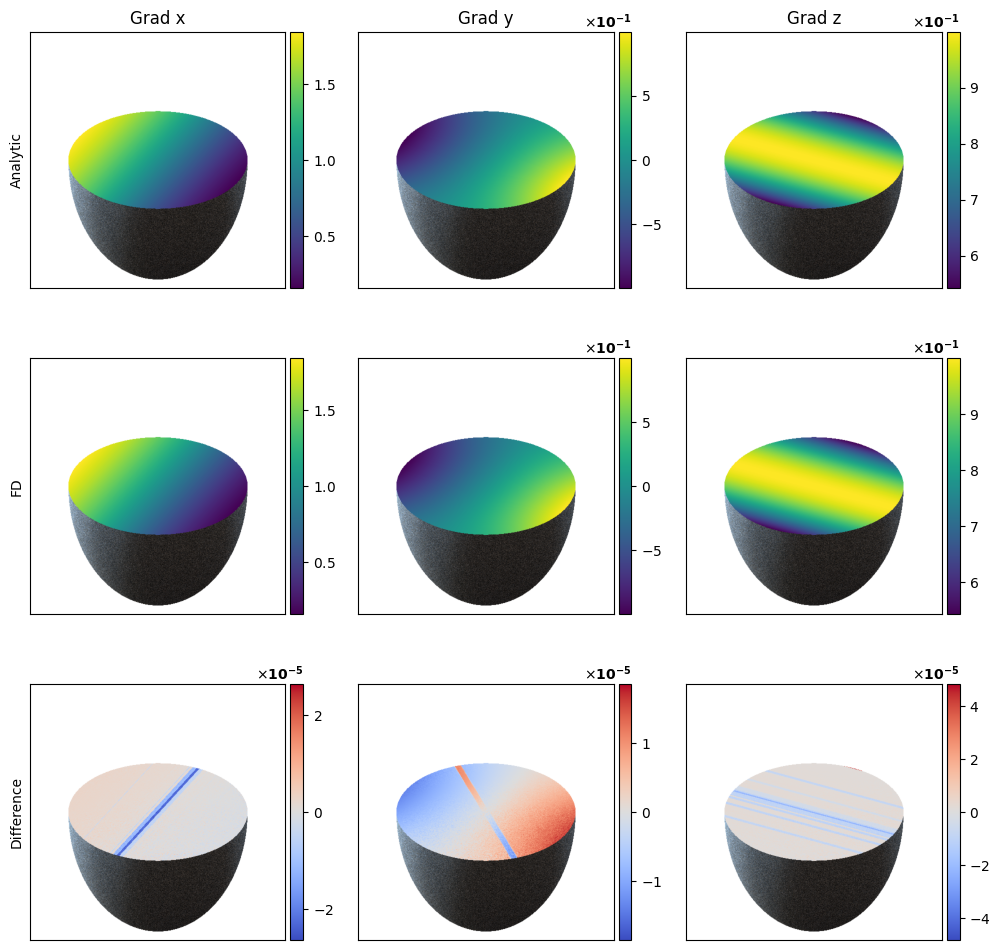

In [9]:

yx_fd1 = tex.get_value(points_y + fd * mi.Point3f(1,0,0))
yx_fd2 = tex.get_value(points_y - fd * mi.Point3f(1,0,0))
yy_fd1 = tex.get_value(points_y + fd * mi.Point3f(0,1,0))
yy_fd2 = tex.get_value(points_y - fd * mi.Point3f(0,1,0))
yz_fd1 = tex.get_value(points_y + fd * mi.Point3f(0,0,1))
yz_fd2 = tex.get_value(points_y - fd * mi.Point3f(0,0,1))

yx_fd = (yx_fd1 - yx_fd2) / fd_step
yy_fd = (yy_fd1 - yy_fd2) / fd_step
yz_fd = (yz_fd1 - yz_fd2) / fd_step

_, fd_yx = create_slice_from_result(yx_fd, resolution)
_, fd_yy = create_slice_from_result(yy_fd, resolution)
_, fd_yz = create_slice_from_result(yz_fd, resolution)

_, analytic_yx = create_slice_from_result(grad_y[0], resolution)
_, analytic_yy = create_slice_from_result(grad_y[1], resolution)
_, analytic_yz = create_slice_from_result(grad_y[2], resolution)


_, diff_yx = create_slice_from_result(grad_y[0] - yx_fd, resolution)
_, diff_yy = create_slice_from_result(grad_y[1] - yy_fd, resolution)
_, diff_yz = create_slice_from_result(grad_y[2] - yz_fd, resolution)


fig, ax = plt.subplots(3,3, figsize = (12,12))

analytic_yx3D, norm_analytic_x = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = analytic_yx, colormap = cmap, scale_cam=scale_cam)
analytic_yy3D, norm_analytic_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = analytic_yy, colormap = cmap, scale_cam=scale_cam)
analytic_yz3D, norm_analytic_z = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = analytic_yz, colormap = cmap, scale_cam=scale_cam)

fd_yx3D, norm_fd_x = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = fd_yx, colormap = cmap, scale_cam=scale_cam)
fd_yy3D, norm_fd_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = fd_yy, colormap = cmap, scale_cam=scale_cam)
fd_yz3D, norm_fd_z = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = fd_yz, colormap = cmap, scale_cam=scale_cam)

diff_yx3D, norm_diff_x = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = diff_yx, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)
diff_yy3D, norm_diff_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = diff_yy, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)
diff_yz3D, norm_diff_z = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = diff_yz, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)

plot_image_3D(analytic_yx3D, ax[0,0], norm = norm_analytic_x, cmap = cmap);
plot_image_3D(analytic_yy3D, ax[0,1], norm = norm_analytic_y, cmap = cmap);
plot_image_3D(analytic_yz3D, ax[0,2], norm = norm_analytic_z, cmap = cmap);

plot_image_3D(fd_yx3D, ax[1,0], norm = norm_fd_x, cmap = cmap);
plot_image_3D(fd_yy3D, ax[1,1], norm = norm_fd_y, cmap = cmap);
plot_image_3D(fd_yz3D, ax[1,2], norm = norm_fd_z, cmap = cmap);

plot_image_3D(diff_yx3D, ax[2,0], norm = norm_diff_x, cmap = "coolwarm");
plot_image_3D(diff_yy3D, ax[2,1], norm = norm_diff_y, cmap = "coolwarm");
plot_image_3D(diff_yz3D, ax[2,2], norm = norm_diff_z, cmap = "coolwarm");

ax[0,0].set_ylabel("Analytic")
ax[1,0].set_ylabel("FD")
ax[2,0].set_ylabel("Difference")

ax[0,0].set_title("Grad x")
ax[0,1].set_title("Grad y")
ax[0,2].set_title("Grad z")

16777216
[-0.2750834822654724, 2.2748939990997314]
16777216
[-0.995454728603363, 0.9953020811080933]
16777216
[0.8767397403717041, 0.9992114901542664]
16777216
[-0.27508243918418884, 2.2748899459838867]
16777216
[-0.9954767227172852, 0.9953261613845825]
16777216
[0.8767567873001099, 0.9992337226867676]
16777216
[-4.770001396536827e-05, 4.770001396536827e-05]
16777216
[-2.406444400548935e-05, 2.406444400548935e-05]
16777216
[-2.4501001462340355e-05, 2.4501001462340355e-05]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06559223..1.3951459

Text(0.5, 1.0, 'Grad z')

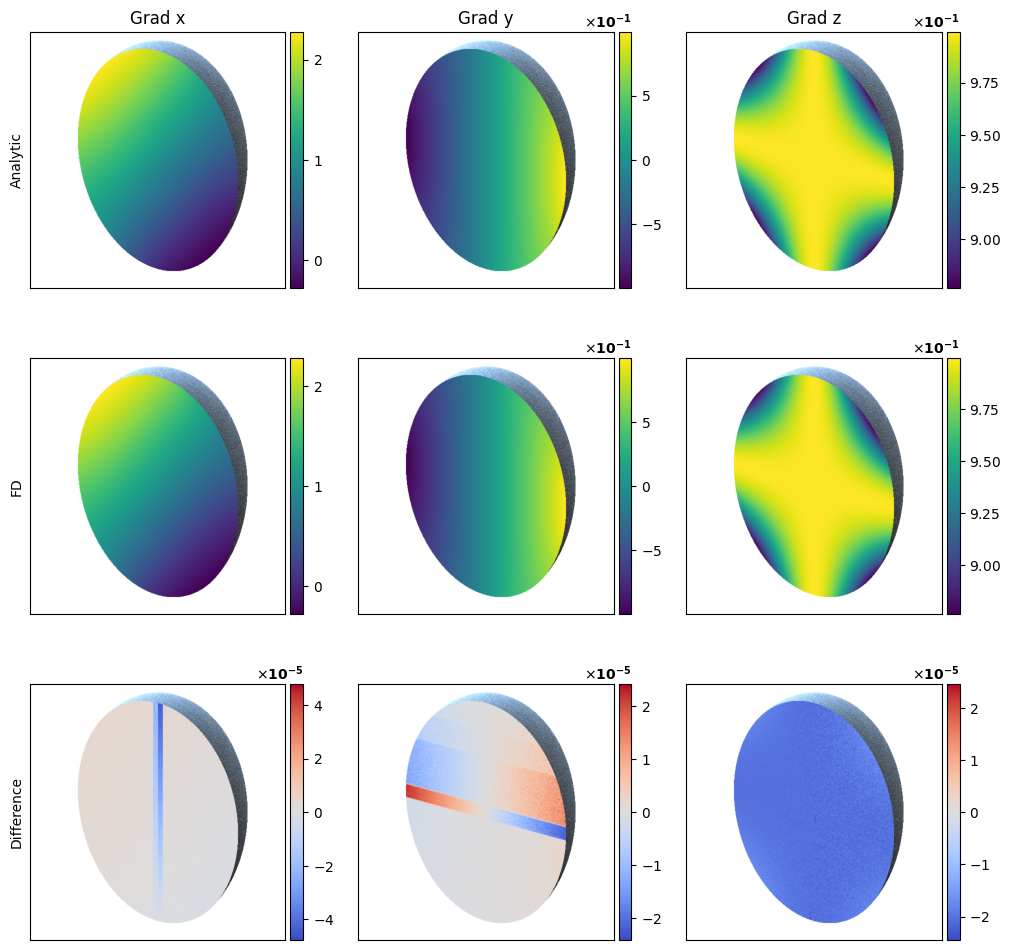

In [10]:

zx_fd1 = tex.get_value(points_z + fd * mi.Point3f(1,0,0))
zx_fd2 = tex.get_value(points_z - fd * mi.Point3f(1,0,0))
zy_fd1 = tex.get_value(points_z + fd * mi.Point3f(0,1,0))
zy_fd2 = tex.get_value(points_z - fd * mi.Point3f(0,1,0))
zz_fd1 = tex.get_value(points_z + fd * mi.Point3f(0,0,1))
zz_fd2 = tex.get_value(points_z - fd * mi.Point3f(0,0,1))

zx_fd = (zx_fd1 - zx_fd2) / fd_step
zy_fd = (zy_fd1 - zy_fd2) / fd_step
zz_fd = (zz_fd1 - zz_fd2) / fd_step

_, fd_zx = create_slice_from_result(zx_fd, resolution)
_, fd_zy = create_slice_from_result(zy_fd, resolution)
_, fd_zz = create_slice_from_result(zz_fd, resolution)

_, analytic_zx = create_slice_from_result(grad_z[0], resolution)
_, analytic_zy = create_slice_from_result(grad_z[1], resolution)
_, analytic_zz = create_slice_from_result(grad_z[2], resolution)


_, diff_zx = create_slice_from_result(grad_z[0] - zx_fd, resolution)
_, diff_zy = create_slice_from_result(grad_z[1] - zy_fd, resolution)
_, diff_zz = create_slice_from_result(grad_z[2] - zz_fd, resolution)


fig, ax = plt.subplots(3,3, figsize = (12,12))

analytic_zx3D, norm_analytic_x = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = analytic_zx, colormap = cmap, scale_cam=scale_cam)
analytic_zy3D, norm_analytic_y = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = analytic_zy, colormap = cmap, scale_cam=scale_cam)
analytic_zz3D, norm_analytic_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = analytic_zz, colormap = cmap, scale_cam=scale_cam)

fd_zx3D, norm_fd_x = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = fd_zx, colormap = cmap, scale_cam=scale_cam)
fd_zy3D, norm_fd_y = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = fd_zy, colormap = cmap, scale_cam=scale_cam)
fd_zz3D, norm_fd_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = fd_zz, colormap = cmap, scale_cam=scale_cam)

diff_zx3D, norm_diff_x = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = diff_zx, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)
diff_zy3D, norm_diff_y = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = diff_zy, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)
diff_zz3D, norm_diff_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = diff_zz, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)

plot_image_3D(analytic_zx3D, ax[0,0], norm = norm_analytic_x, cmap = cmap);
plot_image_3D(analytic_zy3D, ax[0,1], norm = norm_analytic_y, cmap = cmap);
plot_image_3D(analytic_zz3D, ax[0,2], norm = norm_analytic_z, cmap = cmap);

plot_image_3D(fd_zx3D, ax[1,0], norm = norm_fd_x, cmap = cmap);
plot_image_3D(fd_zy3D, ax[1,1], norm = norm_fd_y, cmap = cmap);
plot_image_3D(fd_zz3D, ax[1,2], norm = norm_fd_z, cmap = cmap);

plot_image_3D(diff_zx3D, ax[2,0], norm = norm_diff_x, cmap = "coolwarm");
plot_image_3D(diff_zy3D, ax[2,1], norm = norm_diff_y, cmap = "coolwarm");
plot_image_3D(diff_zz3D, ax[2,2], norm = norm_diff_z, cmap = "coolwarm");

ax[0,0].set_ylabel("Analytic")
ax[1,0].set_ylabel("FD")
ax[2,0].set_ylabel("Difference")

ax[0,0].set_title("Grad x")
ax[0,1].set_title("Grad y")
ax[0,2].set_title("Grad z")

16777216
[-1.981614351272583, -0.018335646018385887]
16777216
[-1.8460350036621094, 0.23551073670387268]
16777216
[-1.7507760524749756, 0.23564593493938446]
16777216
[-1.9881129264831543, -0.007227063179016113]
16777216
[-1.882612705230713, 0.2524256706237793]
16777216
[-1.7529726028442383, 0.24572014808654785]
16777216
[-0.044038522988557816, 0.044038522988557816]
16777216
[-0.08251805603504181, 0.08251805603504181]
16777216
[-0.031111720949411392, 0.031111720949411392]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3949977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0258231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004874..1.3951459].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01555616..1.3949977].
Clippin

Text(0.5, 1.0, 'Cut Z')

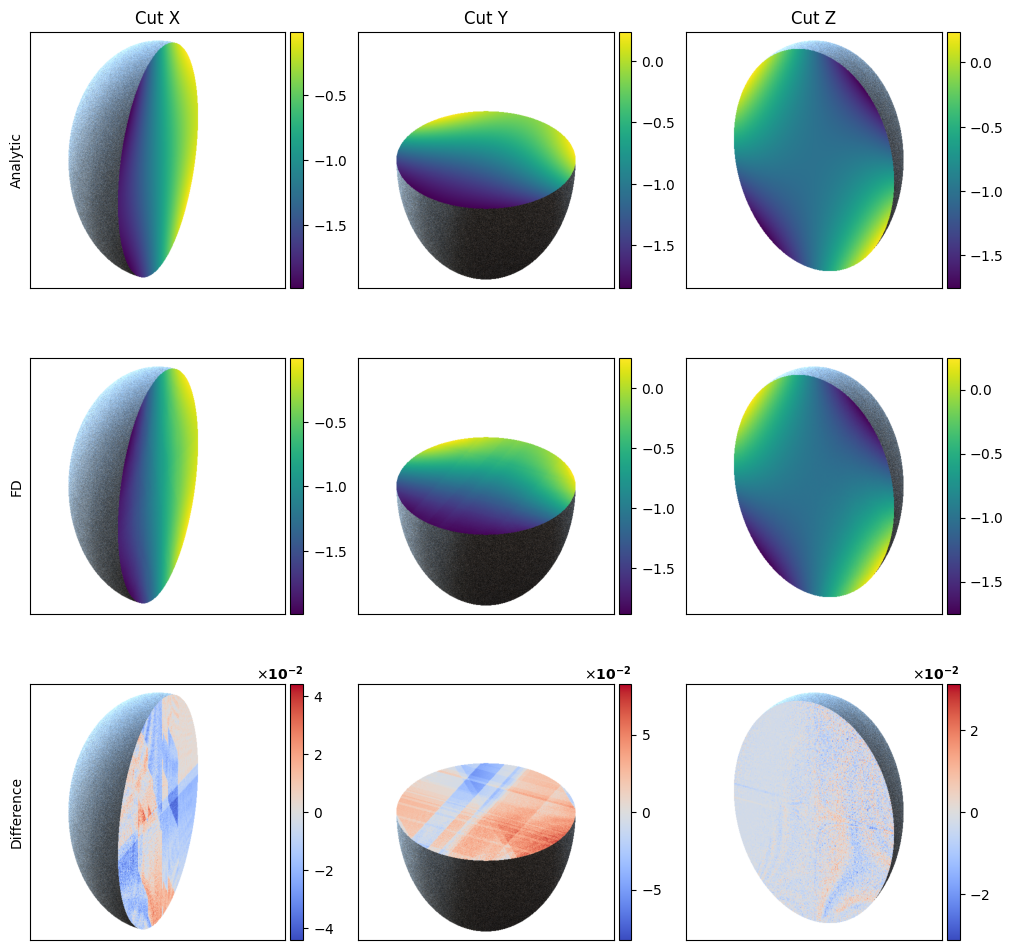

In [11]:

laplacian_fd_x = (xx_fd1 + xx_fd2 + xy_fd1 + xy_fd2 + xz_fd1 + xz_fd2 - 6 * tex_x) / dr.square(fd)
laplacian_fd_y = (yx_fd1 + yx_fd2 + yy_fd1 + yy_fd2 + yz_fd1 + yz_fd2 - 6 * tex_y) / dr.square(fd)
laplacian_fd_z = (zx_fd1 + zx_fd2 + zy_fd1 + zy_fd2 + zz_fd1 + zz_fd2 - 6 * tex_z) / dr.square(fd)


_, fd_lx = create_slice_from_result(laplacian_fd_x, resolution)
_, fd_ly = create_slice_from_result(laplacian_fd_y, resolution)
_, fd_lz = create_slice_from_result(laplacian_fd_z, resolution)

_, analytic_lx = create_slice_from_result(laplacian_x, resolution)
_, analytic_ly = create_slice_from_result(laplacian_y, resolution)
_, analytic_lz = create_slice_from_result(laplacian_z, resolution)


_, diff_lx = create_slice_from_result(laplacian_x - laplacian_fd_x, resolution)
_, diff_ly = create_slice_from_result(laplacian_y - laplacian_fd_y, resolution)
_, diff_lz = create_slice_from_result(laplacian_z - laplacian_fd_z, resolution)

fig, ax = plt.subplots(3,3, figsize = (12,12))

analytic_lx3D, norm_analytic_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = analytic_lx, colormap = cmap, scale_cam=scale_cam)
analytic_ly3D, norm_analytic_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = analytic_ly, colormap = cmap, scale_cam=scale_cam)
analytic_lz3D, norm_analytic_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = analytic_lz, colormap = cmap, scale_cam=scale_cam)

fd_lx3D, norm_fd_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = fd_lx, colormap = cmap, scale_cam=scale_cam)
fd_ly3D, norm_fd_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = fd_ly, colormap = cmap, scale_cam=scale_cam)
fd_lz3D, norm_fd_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = fd_lz, colormap = cmap, scale_cam=scale_cam)

diff_lx3D, norm_diff_x = shape.visualize(cam_origin = cam_x, slice = slice_x, slice_image = diff_lx, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)
diff_ly3D, norm_diff_y = shape.visualize(cam_origin = cam_y, slice = slice_y, slice_image = diff_ly, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)
diff_lz3D, norm_diff_z = shape.visualize(cam_origin = cam_z, slice = slice_z, slice_image = diff_lz, colormap = "coolwarm", sym_colorbar=True, scale_cam=scale_cam)

plot_image_3D(analytic_lx3D, ax[0,0], norm = norm_analytic_x, cmap = cmap);
plot_image_3D(analytic_ly3D, ax[0,1], norm = norm_analytic_y, cmap = cmap);
plot_image_3D(analytic_lz3D, ax[0,2], norm = norm_analytic_z, cmap = cmap);

plot_image_3D(fd_lx3D, ax[1,0], norm = norm_fd_x, cmap = cmap);
plot_image_3D(fd_ly3D, ax[1,1], norm = norm_fd_y, cmap = cmap);
plot_image_3D(fd_lz3D, ax[1,2], norm = norm_fd_z, cmap = cmap);

plot_image_3D(diff_lx3D, ax[2,0], norm = norm_diff_x, cmap = "coolwarm");
plot_image_3D(diff_ly3D, ax[2,1], norm = norm_diff_y, cmap = "coolwarm");
plot_image_3D(diff_lz3D, ax[2,2], norm = norm_diff_z, cmap = "coolwarm");

ax[0,0].set_ylabel("Analytic")
ax[1,0].set_ylabel("FD")
ax[2,0].set_ylabel("Difference")

ax[0,0].set_title("Cut X")
ax[0,1].set_title("Cut Y")
ax[0,2].set_title("Cut Z")